***

# Análisis de datos I

***

### Taller 3 - Comparte tu análisis bivariado

#### 1. Selección de las columnas para el análisis.

Para llevar a cabo el análisis univariado del dataset definido, se seleccionaron las siguientes columnas: 

1. **Saldo (Balance)**: El saldo o balance en la cuenta bancaria es importante para evaluar la salud financiera del cliente y su potencial lealtad. Un saldo más alto podría estar correlacionado con una menor tasa de cancelación, dado que los clientes con más dinero podrían estar más satisfechos y menos propensos a abandonar la entidad bancaria.

2. **PuntajeCredito (CreditScore)**: Este es un indicador relevante de la solvencia financiera del cliente. Un puntaje de crédito más alto generalmente sugiere un menor riesgo de impago. Por lo que comprender la distribución de esta variable puede ayudar a identificar segmentos de clientes con mayor riesgo de abandono.

El análisis de la relación entre el **Saldo** y el **PuntajeCredito** puede proporcionar una visión integral sobre la salud financiera y la capacidad crediticia de los clientes, aspectos fundamentales para evaluar la probabilidad de un cliente para abandonar la entidad bancaria. Este entendimiento es importante para gestionar adecuadamente el riesgo y desarrollar estrategias efectivas de retención de clientes.

#### 2. Análisis estadístico y gráfico bivariado

A continuación se presenta el análisis estadístico y gráfico bivariado para las columnas seleccionadas, implementado en Python.

In [5]:
# Importar las bibliotecas de Python requeridas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el Data Frame.
df = pd.read_csv('customer_churn_records.csv')

# Eliminar la columna RowNumber del DataFrame.
df = df.drop('RowNumber', axis = 1)

In [6]:
# Verificar si existen datos vacíos o faltantes en el Dataframe.
df.isna().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Se puede observar que no hay datos vacíos o faltantes en el dataset definido.

In [7]:
# Imprimir los primeros cinco registros del DataFrame.
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
# Imprimir los últimos cinco registros del DataFrame.
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [9]:
# Definir los nombres de las columas del DataFrame.
df.columns = ['ClienteId', 'Nombre', 'PuntajeCredito', 'Pais', 'Genero', 'Edad', 'TiempoPermanencia', 'Saldo', 'CantidadProductos', 'TieneTarjetaCredito', 'EstaActivo', 'SalarioEstimado', 'ClienteAbandono', 'HizoReclamo', 'NivelSatisfaccion', 'TipoTarjeta', 'PuntosObtenidos']

# Imprimir los primeros cinco registros del DataFrame con los nuevos nombres de las columnas.
df.head()

,ClienteId,Nombre,PuntajeCredito,Pais,Genero,Edad,TiempoPermanencia,Saldo,CantidadProductos,TieneTarjetaCredito,EstaActivo,SalarioEstimado,ClienteAbandono,HizoReclamo,NivelSatisfaccion,TipoTarjeta,PuntosObtenidos
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


A continuación se presentan los estadísticos y gráficos para analizar la relación entre las columnas **Saldo** y **PuntajeCredito**.

In [35]:
# Obtener los datos de las columnas Saldo, PuntajeCredito y ClienteAbandono.
saldo = df['Saldo']
puntaje_credito = df['PuntajeCredito']

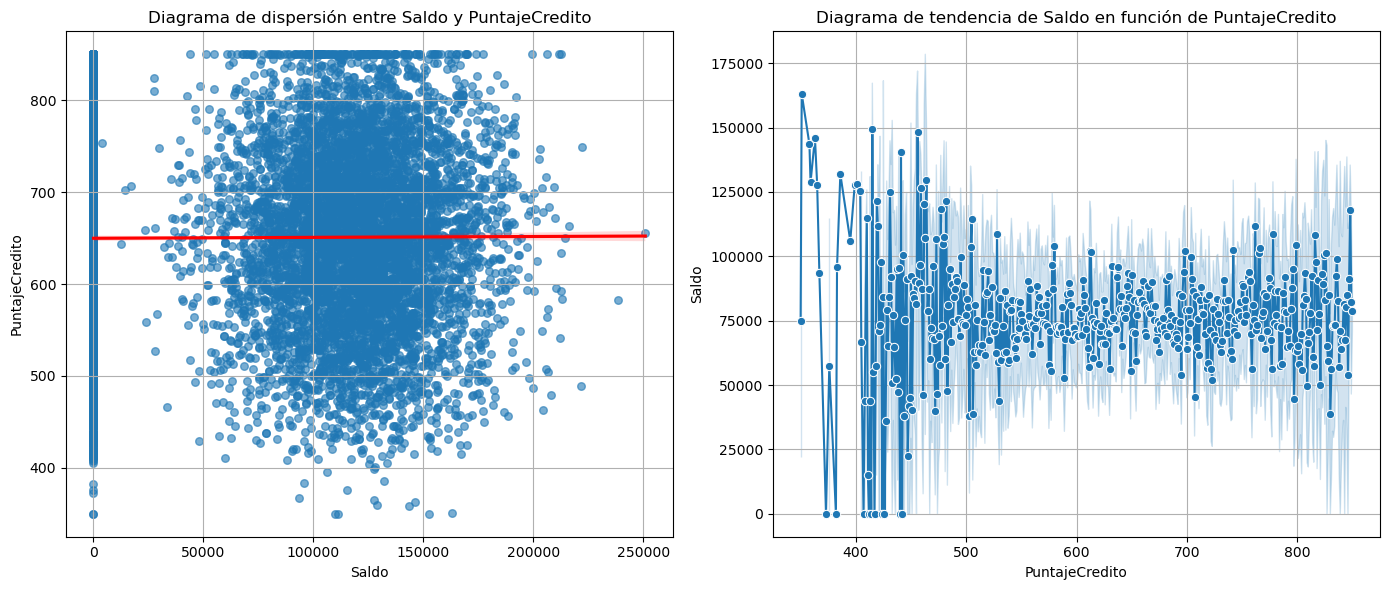

In [90]:
plt.figure(figsize = (14, 6))

# Gráfico de dispersión con regresión líneal entre Saldo y PuntajeCredito.
plt.subplot(1, 2, 1)
sns.regplot(x = 'Saldo', y = 'PuntajeCredito', data = df, scatter_kws = {'s': 30, 'alpha': 0.6}, line_kws = {'color': 'red'})
plt.title('Diagrama de dispersión entre Saldo y PuntajeCredito')
plt.xlabel('Saldo')
plt.ylabel('PuntajeCredito')
plt.grid(True)

# Gráfico de tendencia (líneas) entre Saldo y PuntajeCredito.
plt.subplot(1, 2, 2)
sns.lineplot(x = 'PuntajeCredito', y = 'Saldo', data = df, marker = 'o', linestyle = '-')
plt.title('Diagrama de tendencia de Saldo en función de PuntajeCredito')
plt.xlabel('PuntajeCredito')
plt.ylabel('Saldo')
plt.grid(True)

plt.tight_layout()
plt.show()

En el diagrama de dispersión se observa que los puntos de datos se distribuyen de manera bastante dispersa sin una agrupación clara ni un patrón identificable. La línea de regresión que se ajusta a estos puntos es casi horizontal, indicando una relación lineal extremadamente débil entre **Saldo** y **PuntajeCredito**, así como una correlación muy baja entre estas dos variables.

En cuanto al diagrama de tendencia, este refuerza los hallazgos obtenidos a partir del diagrama de dispersión. El gráfico evidencia la ausencia de una tendencia definida, lo cual sugiere que **Saldo** no presenta un patrón de variación sistemático en relación de las variaciones en **PuntajeCredito**.

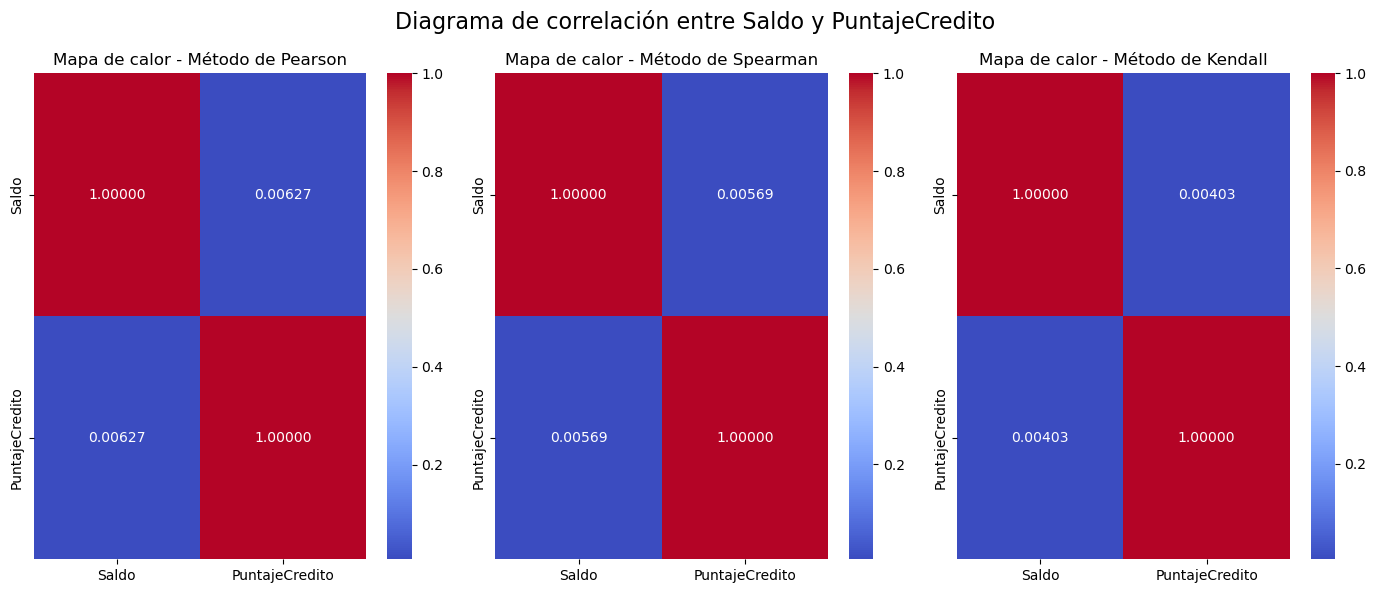

Correlación entre Saldo y PuntajeCredito
Método de Pearson: 0.006268381616008921
Método de Spearman: 0.005686570567648804
Método de Kendall: 0.004034103909872098


In [70]:
# Cálculo de la correlación entre Saldo y PuntajeCredito utilizando los métodos de Pearson, Spearman y Kendall.
corr_pearson = df[['Saldo','PuntajeCredito']].corr(method = 'pearson').iloc[0, 1]
corr_spearman = df[['Saldo','PuntajeCredito']].corr(method = 'spearman').iloc[0, 1]
corr_kendall = df[['Saldo','PuntajeCredito']].corr(method = 'kendall').iloc[0, 1]

# Gráfico del mapa de calor de la matriz de correlación entre Saldo y PuntajeCredito utilizando los métodos de Pearson, Spearman y Kendall.
plt.figure(figsize = (14, 6))
plt.suptitle('Diagrama de correlación entre Saldo y PuntajeCredito', fontsize = 16)

plt.subplot(1, 3, 1)
sns.heatmap(df[['Saldo', 'PuntajeCredito']].corr(method = 'pearson'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Pearson')

plt.subplot(1, 3, 2)
sns.heatmap(df[['Saldo', 'PuntajeCredito']].corr(method = 'spearman'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Spearman')

plt.subplot(1, 3, 3)
sns.heatmap(df[['Saldo', 'PuntajeCredito']].corr(method = 'kendall'), annot = True, cmap = 'coolwarm', fmt = '.5f')
plt.title('Mapa de calor - Método de Kendall')

plt.tight_layout()
plt.show()

print(f'Correlación entre Saldo y PuntajeCredito')
print(f'Método de Pearson: {corr_pearson}')
print(f'Método de Spearman: {corr_spearman}')
print(f'Método de Kendall: {corr_kendall}')

El análisis de correlación entre las columnas **Saldo** y **PuntajeCredito** muestra que los coeficientes de correlación, calculados mediante los métodos de Pearson, Spearman y Kendall, son similares pero extremadamente bajos. Esto sugiere que estas columnas tienen una relación muy débil o casi nula, independientemente del método utilizado. Esta baja correlación podría estar influenciada por la gran cantidad de clientes que tienen un saldo de \\$0 en sus cuentas.

Dado que la relación entre estas variables es prácticamente inexistente, ni el saldo ni el puntaje de crédito parecen ser indicadores efectivos por sí solos para predecir el riesgo de abandono de los clientes de la entidad bancaria. Esto podría indicar la necesidad de explorar otras variables dentro del conjunto de datos para una evaluación más precisa del modelo.

#### 3. Conclusiones

1. El análisis bivariado revela una relación extremadamente débil entre **Saldo** y **PuntajeCredito**, con coeficientes de correlación cercanos a cero, indicando una relación casi nula.
2. Los diagramas de dispersión y de tendencia muestran una relación lineal débil sin un patrón claro, sugiriendo que **Saldo** no varía sistemáticamente respecto a **PuntajeCredito**.
3. Los métodos de correlación utilizados (Pearson, Spearman, Kendall) confirman esta baja correlación, posiblemente afectada por la alta proporción de clientes con saldo cero.
4. Estas variables no serían indicadores efectivos para predecir el riesgo de abandono. Se recomienda explorar otras variables para mejorar la precisión del modelo.